This notebook is used to create the dataframe that includes the heatsources in the model. The data is extracted from the VESTA-MAIS model.

In [1]:
# import packages

import numpy as np 
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

# import seaborn as sns
import matplotlib. pyplot as plt # for plotting graphs
import matplotlib.mlab as mlab # 
import matplotlib
plt.style.use('ggplot') # basic, but functional, plotstyle,
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
# read data

#
puntbronnen_input = pd.read_csv('/Users/jaromirbogdanovski/Documents/Studie/EPA/Master Thesis/Igor Nikolic/Coding/Data/Input/20190802_puntbronnen_MT (1).csv', delimiter = ';')

In [64]:
puntbronnen_1 = puntbronnen_input
puntbronnen_1 = puntbronnen_1.fillna(0)
puntbronnen_1

,X,Y,bron_naam,type_bron,MWcapaciteit,capfactor,volfactor,status,Brontemperatuur,Uitkoppel_min,Uitkoppel_max,Productiekosten,targetGMC,geometry
0,196042,322034,Onbekend Heerlen,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (196042.000 322034.000)
1,159047,386589,Onbekend Eindhoven 1,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (159047.000 386589.000)
2,155157,383127,Onbekend Eindhoven 2,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (155157.000 383127.000)
3,147935,411104,Onbekend Den Bosch,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (147935.000 411104.000)
4,62179,367392,Onbekend Hulst,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (62179.000 367392.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,261647,592403,Zeolyst CV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (261647.000 592403.000)
600,239993,487925,Zwanenberg Food Group BV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (239993.000 487925.000)
601,156566,463505,Zwembad Amarena,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (156566.000 463505.000)
602,151774,463174,Zwembad Bosbad,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (151774.000 463174.000)


In [65]:
# set NaN in MWcapaciteit to 0


In [66]:
puntbronnen_gdf = gpd.GeoDataFrame(puntbronnen_1, geometry=gpd.points_from_xy(puntbronnen_input.X,puntbronnen_input.Y), crs="EPSG:28992")

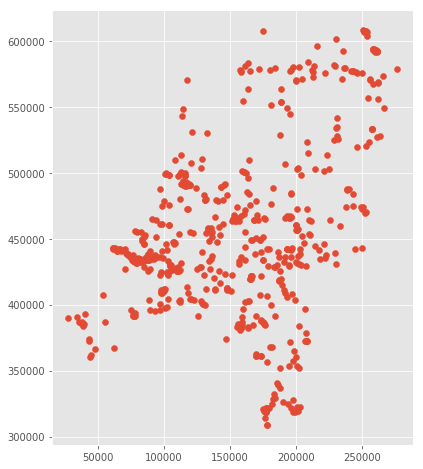

In [67]:
puntbronnen_gdf.plot()

In [68]:
#puntbronnen_gdf.crs
puntbronnen_gdf_WGS84 = puntbronnen_gdf.to_crs("EPSG:32632")

In [69]:
puntbronnen_gdf_WGS84

,X,Y,bron_naam,type_bron,MWcapaciteit,capfactor,volfactor,status,Brontemperatuur,Uitkoppel_min,Uitkoppel_max,Productiekosten,targetGMC,geometry
0,196042,322034,Onbekend Heerlen,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (286918.600 5641589.956)
1,159047,386589,Onbekend Eindhoven 1,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (253133.053 5707902.913)
2,155157,383127,Onbekend Eindhoven 2,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (249075.354 5704635.652)
3,147935,411104,Onbekend Den Bosch,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (243241.499 5732948.070)
4,62179,367392,Onbekend Hulst,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (155367.863 5693488.840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,261647,592403,Zeolyst CV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (365887.163 5908359.936)
600,239993,487925,Zwanenberg Food Group BV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (339024.953 5805113.842)
601,156566,463505,Zwembad Amarena,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (254468.355 5784879.782)
602,151774,463174,Zwembad Bosbad,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (249663.684 5784787.804)


In [74]:
puntbronnen_gdf_WGS84.MWcapaciteit.dtypes

dtype('float64')

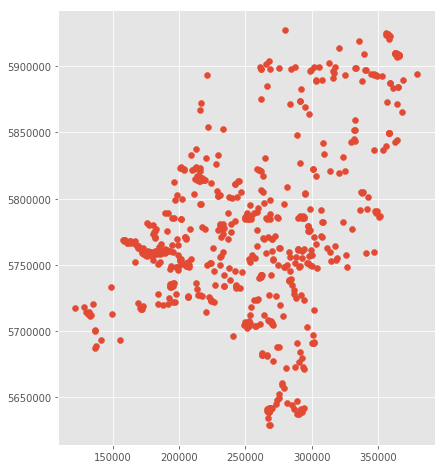

In [71]:
puntbronnen_gdf_WGS84.plot()

In [72]:
# writing data
puntbronnen_gdf_WGS84.to_file("/Users/jaromirbogdanovski/Documents/Studie/EPA/Master Thesis/Igor Nikolic/Coding/Data/Output/MT_puntbronnen_v1.shp")

In [2]:
df_heatsources = gpd.read_file("/Users/jaromirbogdanovski/Documents/Studie/EPA/Master Thesis/Igor Nikolic/Coding/Data/Output/MT_puntbronnen_v1.shp")

In [3]:
df_heatsources

,X,Y,bron_naam,type_bron,MWcapacite,capfactor,volfactor,status,Brontemper,Uitkoppel_,Uitkoppe_1,Productiek,targetGMC,geometry
0,196042,322034,Onbekend Heerlen,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (286918.600 5641589.956)
1,159047,386589,Onbekend Eindhoven 1,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (253133.053 5707902.913)
2,155157,383127,Onbekend Eindhoven 2,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (249075.354 5704635.652)
3,147935,411104,Onbekend Den Bosch,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (243241.499 5732948.070)
4,62179,367392,Onbekend Hulst,Gasmotor,0.5,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (155367.863 5693488.840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,261647,592403,Zeolyst CV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (365887.163 5908359.936)
600,239993,487925,Zwanenberg Food Group BV,0,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (339024.953 5805113.842)
601,156566,463505,Zwembad Amarena,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (254468.355 5784879.782)
602,151774,463174,Zwembad Bosbad,Industrie,0.0,0.0,0.0,Optie B,0.0,0.0,0.0,0.0,0,POINT (249663.684 5784787.804)


In [4]:
df_latex1 = df_heatsources[['X','Y','MWcapacite']].describe()

In [5]:
print(df_latex1.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &              X &              Y &   MWcapacite \\
\midrule
count &     604.000000 &     604.000000 &   604.000000 \\
mean  &  153579.753311 &  452678.384106 &    25.970166 \\
std   &   58429.836916 &   66692.505690 &   127.735194 \\
min   &   27500.000000 &  308751.000000 &     0.000000 \\
25\%   &  102100.250000 &  412482.500000 &     0.000000 \\
50\%   &  158505.000000 &  439587.000000 &     0.000000 \\
75\%   &  196133.250000 &  487580.750000 &     0.452500 \\
max   &  276380.000000 &  608511.000000 &  1625.250000 \\
\bottomrule
\end{tabular}

